In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [96]:
#
df = pd.read_csv('../data/mmALL_073119_csv.csv')

In [97]:
df.head()

,id,country,ccode,year,region,protest,protestnumber,startday,startmonth,startyear,...,protesterdemand4,stateresponse1,stateresponse2,stateresponse3,stateresponse4,stateresponse5,stateresponse6,stateresponse7,sources,notes
0,201990001,Canada,20,1990,North America,1,1,15.0,1.0,1990.0,...,NaN,ignore,NaN,NaN,NaN,NaN,NaN,NaN,1. Great Canadian train journeys into history;...,Canada s railway passenger system was finally...
1,201990002,Canada,20,1990,North America,1,2,25.0,6.0,1990.0,...,NaN,ignore,NaN,NaN,NaN,NaN,NaN,NaN,1. Autonomy s Cry Revived in Quebec The New Yo...,protestors were only identified as young peop...
2,201990003,Canada,20,1990,North America,1,3,1.0,7.0,1990.0,...,NaN,ignore,NaN,NaN,NaN,NaN,NaN,NaN,1. Quebec protest after Queen calls for unity ...,"THE Queen, after calling on Canadians to rema..."
3,201990004,Canada,20,1990,North America,1,4,12.0,7.0,1990.0,...,NaN,accomodation,NaN,NaN,NaN,NaN,NaN,NaN,1. Indians Gather as Siege Intensifies; Armed ...,Canada s federal government has agreed to acq...
4,201990005,Canada,20,1990,North America,1,5,14.0,8.0,1990.0,...,NaN,crowd dispersal,arrests,accomodation,NaN,NaN,NaN,NaN,1. Dozens hurt in Mohawk blockade protest The ...,Protests were directed against the state due t...


In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16363 entries, 0 to 16362
Data columns (total 31 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     16363 non-null  int64  
 1   country                16363 non-null  object 
 2   ccode                  16363 non-null  int64  
 3   year                   16363 non-null  int64  
 4   region                 16363 non-null  object 
 5   protest                16363 non-null  int64  
 6   protestnumber          16363 non-null  int64  
 7   startday               14514 non-null  float64
 8   startmonth             14514 non-null  float64
 9   startyear              14514 non-null  float64
 10  endday                 14514 non-null  float64
 11  endmonth               14514 non-null  float64
 12  endyear                14514 non-null  float64
 13  protesterviolence      15033 non-null  float64
 14  location               14493 non-null  object 
 15  pa

In [99]:
df.shape

(16363, 31)

In [100]:
# Filter out non-protests
df = df[df['protest'] == 1]
df = df[df['stateresponse1'].notna()]

In [101]:
df.shape

(14483, 31)

In [102]:
df.drop(columns=['id', 'ccode', 'protest', 'location', 'participants_category', 'protesteridentity', 'sources'], inplace=True)

In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14483 entries, 0 to 16360
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   country            14483 non-null  object 
 1   year               14483 non-null  int64  
 2   region             14483 non-null  object 
 3   protestnumber      14483 non-null  int64  
 4   startday           14483 non-null  float64
 5   startmonth         14483 non-null  float64
 6   startyear          14483 non-null  float64
 7   endday             14483 non-null  float64
 8   endmonth           14483 non-null  float64
 9   endyear            14483 non-null  float64
 10  protesterviolence  14483 non-null  float64
 11  participants       14471 non-null  object 
 12  protesterdemand1   14474 non-null  object 
 13  protesterdemand2   2665 non-null   object 
 14  protesterdemand3   315 non-null    object 
 15  protesterdemand4   766 non-null    object 
 16  stateresponse1     144

# Make new state response variables as inputs

In [104]:
# Create a list of all the demand columns
responses = ['stateresponse1', 'stateresponse2', 'stateresponse3', 'stateresponse4', 'stateresponse5', 
             'stateresponse6', 'stateresponse7']

In [105]:
# Combine the different protester demand columns into a list inside a single column
df['stateresponses'] = df[responses].values.tolist()

# Source: https://stackoverflow.com/questions/43898035/pandas-combine-column-values-into-a-list-in-a-new-column

In [106]:
# Turn the list of protester demands into dummy columns
response_dummy = pd.get_dummies(df['stateresponses'].apply(pd.Series).stack(), drop_first=True).sum(level=0)

# Source: https://stackoverflow.com/questions/29034928/pandas-convert-a-column-of-list-to-dummies

In [108]:
response_dummy.head()

,accomodation,arrests,beatings,crowd dispersal,ignore,killings,shootings
0,0,0,0,0,1,0,0
1,0,0,0,0,1,0,0
2,0,0,0,0,1,0,0
3,1,0,0,0,0,0,0
4,1,1,0,1,0,0,0


In [118]:
response_dummy['accomodation'].value_counts()

0    12991
1     1492
Name: accomodation, dtype: int64

In [117]:
response_dummy = response_dummy.replace([2], 1)
response_dummy = response_dummy.replace([3], 1)

In [120]:
# Add the dummy columns back into the original data frame
df = pd.concat([df, response_dummy], axis =1)

In [121]:
df.drop(columns='stateresponses', inplace=True)

# Clean State Response

### Fill Empty Columns with Null Values for StateResponses

In [122]:
df['stateresponse2'].fillna(value = 0, inplace = True)

In [123]:
df['stateresponse2'].value_counts()

0                  11769
arrests              692
crowd dispersal      567
accomodation         382
beatings             369
shootings            360
killings             311
ignore                33
Name: stateresponse2, dtype: int64

In [124]:
df['stateresponse3'].fillna(value = 0, inplace = True)

In [125]:
df['stateresponse4'].fillna(value = 0, inplace = True)

In [126]:
df['stateresponse4'].fillna(value = 0, inplace = True)

In [127]:
df['stateresponse5'].fillna(value = 0, inplace = True)

In [128]:
df['stateresponse6'].fillna(value = 0, inplace = True)

In [129]:
df['stateresponse7'].fillna(value = 0, inplace = True)

### Weighted Ranks

- ignore: 1

- accomodation: 2

- crowd dispersal: 3
 
- arrests: 4 

- beatings: 5

- shootings: 6

- killings: 7

In [130]:
df['stateresponse1_weight'] = df['stateresponse1'].map({'accomodation': 2, 'ignore': 1, 'crowd dispersal': 3,
                                                       'arrests': 4, 'beatings': 5, 'shootings': 6, 'killings': 7})

In [131]:
df['stateresponse1_weight'].value_counts()

1    7934
3    3612
4    1049
2     937
6     415
5     300
7     236
Name: stateresponse1_weight, dtype: int64

In [132]:
df['stateresponse2_weight'] = df['stateresponse2'].map({'accomodation': 2, 'ignore': 1, 'crowd dispersal': 3,
                                                       'arrests': 4, 'beatings': 5, 'shootings': 6, 'killings': 7})

In [133]:
df['stateresponse2_weight'].fillna(value = 0, inplace = True)

In [134]:
df['stateresponse2_weight'].value_counts()

0.0    11769
4.0      692
3.0      567
2.0      382
5.0      369
6.0      360
7.0      311
1.0       33
Name: stateresponse2_weight, dtype: int64

In [135]:
df['stateresponse3_weight'] = df['stateresponse3'].map({'accomodation': 2, 'ignore': 1, 'crowd dispersal': 3,
                                                       'arrests': 4, 'beatings': 5, 'shootings': 6, 'killings': 7})

In [136]:
df['stateresponse3_weight'].fillna(value = 0, inplace = True)

In [137]:
df['stateresponse3_weight'].value_counts()

0.0    13633
4.0      214
3.0      207
7.0      175
2.0       92
5.0       80
6.0       72
1.0       10
Name: stateresponse3_weight, dtype: int64

In [138]:
df['stateresponse4_weight'] = df['stateresponse4'].map({'accomodation': 2, 'ignore': 1, 'crowd dispersal': 3,
                                                       'arrests': 4, 'beatings': 5, 'shootings': 6, 'killings': 7})

In [139]:
df['stateresponse4_weight'].fillna(value = 0, inplace = True)

In [140]:
df['stateresponse5_weight'] = df['stateresponse5'].map({'accomodation': 2, 'ignore': 1, 'crowd dispersal': 3,
                                                       'arrests': 4, 'beatings': 5, 'shootings': 6, 'killings': 7})

In [141]:
df['stateresponse5_weight'].fillna(value = 0, inplace = True)

In [142]:
df['stateresponse6_weight'] = df['stateresponse6'].map({'accomodation': 2, 'ignore': 1, 'crowd dispersal': 3,
                                                       'arrests': 4, 'beatings': 5, 'shootings': 6, 'killings': 7})

In [143]:
df['stateresponse6_weight'].fillna(value = 0, inplace = True)

In [144]:
df['stateresponse7_weight'] = df['stateresponse7'].map({'accomodation': 2, 'ignore': 1, 'crowd dispersal': 3,
                                                       'arrests': 4, 'beatings': 5, 'shootings': 6, 'killings': 7})

In [145]:
df['stateresponse7_weight'].fillna(value = 0, inplace = True)

In [146]:
df.shape

(14483, 38)

In [147]:
df.head()

,country,year,region,protestnumber,startday,startmonth,startyear,endday,endmonth,endyear,...,ignore,killings,shootings,stateresponse1_weight,stateresponse2_weight,stateresponse3_weight,stateresponse4_weight,stateresponse5_weight,stateresponse6_weight,stateresponse7_weight
0,Canada,1990,North America,1,15.0,1.0,1990.0,15.0,1.0,1990.0,...,1,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0
1,Canada,1990,North America,2,25.0,6.0,1990.0,25.0,6.0,1990.0,...,1,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0
2,Canada,1990,North America,3,1.0,7.0,1990.0,1.0,7.0,1990.0,...,1,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0
3,Canada,1990,North America,4,12.0,7.0,1990.0,6.0,9.0,1990.0,...,0,0,0,2,0.0,0.0,0.0,0.0,0.0,0.0
4,Canada,1990,North America,5,14.0,8.0,1990.0,15.0,8.0,1990.0,...,0,0,0,3,4.0,2.0,0.0,0.0,0.0,0.0


In [148]:
df.iloc[:,-7:]

,stateresponse1_weight,stateresponse2_weight,stateresponse3_weight,stateresponse4_weight,stateresponse5_weight,stateresponse6_weight,stateresponse7_weight
0,1,0.0,0.0,0.0,0.0,0.0,0.0
1,1,0.0,0.0,0.0,0.0,0.0,0.0
2,1,0.0,0.0,0.0,0.0,0.0,0.0
3,2,0.0,0.0,0.0,0.0,0.0,0.0
4,3,4.0,2.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
16355,3,6.0,0.0,0.0,0.0,0.0,0.0
16357,6,7.0,3.0,0.0,0.0,0.0,0.0
16358,2,0.0,0.0,0.0,0.0,0.0,0.0
16359,3,0.0,0.0,0.0,0.0,0.0,0.0


##### Weighted Rank Max

In [149]:
df['stateresponse']= df[['stateresponse1_weight', 'stateresponse2_weight', 'stateresponse3_weight',
                             'stateresponse4_weight', 'stateresponse5_weight', 'stateresponse6_weight',
                             'stateresponse7_weight']].max(axis=1)

In [150]:
df['stateresponse'] = df['stateresponse'].map({ 2.0 :'accomodation', 1.0:'ignore', 3:'crowd dispersal',
                                                       4:'arrests', 5:'beatings', 6:'shootings', 7:'killings'})

In [151]:
df['stateresponse'].value_counts()

ignore             7688
crowd dispersal    2520
arrests            1467
accomodation       1012
killings            768
beatings            616
shootings           412
Name: stateresponse, dtype: int64

In [152]:
df['stateresponse_violence'] = df['stateresponse'].map({'accomodation': 0, 'ignore': 0, 'crowd dispersal': 0,
                                                       'arrests': 1, 'beatings': 1, 'shootings': 1, 'killings': 1})

In [153]:
df['stateresponse_violence'].value_counts(normalize=True)

0    0.774701
1    0.225299
Name: stateresponse_violence, dtype: float64

<AxesSubplot:>

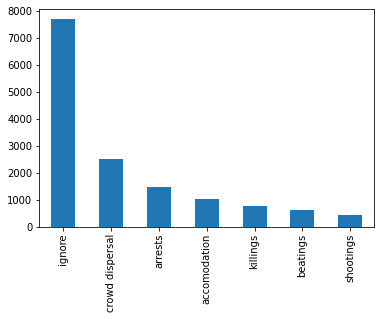

In [154]:
df['stateresponse'].value_counts().plot(kind = 'bar')

In [155]:
X = df['stateresponse'].value_counts()
y = ['Ignore', 'Crowd Dispersal', 'Arrests', 'Accomodation', 'Killings', 'Beatings', 'Shootings']

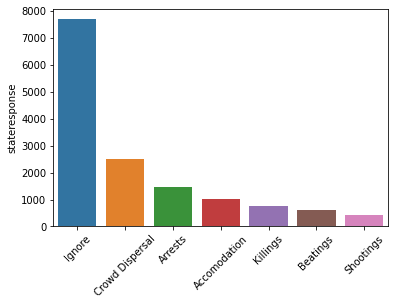

In [156]:
sns.barplot(x = y, y = X)
plt.xticks(rotation = 45);

In [157]:
df.drop(columns=['stateresponse1',
       'stateresponse2', 'stateresponse3', 'stateresponse4', 'stateresponse5',
       'stateresponse6', 'stateresponse7', 'stateresponse1_weight',
       'stateresponse2_weight', 'stateresponse3_weight',
       'stateresponse4_weight', 'stateresponse5_weight',
       'stateresponse6_weight', 'stateresponse7_weight'], inplace=True)

In [158]:
df.columns

Index(['country', 'year', 'region', 'protestnumber', 'startday', 'startmonth',
       'startyear', 'endday', 'endmonth', 'endyear', 'protesterviolence',
       'participants', 'protesterdemand1', 'protesterdemand2',
       'protesterdemand3', 'protesterdemand4', 'notes', 'accomodation',
       'arrests', 'beatings', 'crowd dispersal', 'ignore', 'killings',
       'shootings', 'stateresponse', 'stateresponse_violence'],
      dtype='object')

In [159]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14483 entries, 0 to 16360
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 14483 non-null  object 
 1   year                    14483 non-null  int64  
 2   region                  14483 non-null  object 
 3   protestnumber           14483 non-null  int64  
 4   startday                14483 non-null  float64
 5   startmonth              14483 non-null  float64
 6   startyear               14483 non-null  float64
 7   endday                  14483 non-null  float64
 8   endmonth                14483 non-null  float64
 9   endyear                 14483 non-null  float64
 10  protesterviolence       14483 non-null  float64
 11  participants            14471 non-null  object 
 12  protesterdemand1        14474 non-null  object 
 13  protesterdemand2        2665 non-null   object 
 14  protesterdemand3        315 non-null  

# Clean Protester Demands

In [160]:
df['protesterdemand1'].value_counts()

political behavior, process    9167
labor wage dispute             1661
price increases, tax policy    1056
removal of politician           949
police brutality                782
land farm issue                 447
social restrictions             412
Name: protesterdemand1, dtype: int64

In [161]:
df.shape

(14483, 26)

In [162]:
df = df[df['protesterdemand1'].notnull()]

In [163]:
df.shape

(14474, 26)

In [164]:
df['protesterdemand2'].value_counts()

political behavior, process    970
removal of politician          602
labor wage dispute             413
price increases, tax policy    201
social restrictions            200
police brutality               179
land farm issue                100
Name: protesterdemand2, dtype: int64

In [165]:
df['protesterdemand3'].value_counts()

price increases, tax policy    110
labor wage dispute              60
removal of politician           56
political behavior, process     35
police brutality                28
social restrictions             14
land farm issue                 12
Name: protesterdemand3, dtype: int64

In [166]:
df['protesterdemand4'].value_counts()

.                              744
police brutality                 7
removal of politician            5
political behavior, process      3
land farm issue                  3
labor wage dispute               2
price increases, tax policy      2
Name: protesterdemand4, dtype: int64

In [167]:
# Create a list of all the demand columns
demands = ['protesterdemand1', 'protesterdemand2', 'protesterdemand3', 'protesterdemand4']

In [168]:
# Combine the different protester demand columns into a list inside a single column
df['protesterdemands'] = df[demands].values.tolist()

# Source: https://stackoverflow.com/questions/43898035/pandas-combine-column-values-into-a-list-in-a-new-column

In [169]:
# Turn the list of protester demands into dummy columns
demand_dummy = pd.get_dummies(df['protesterdemands'].apply(pd.Series).stack(), drop_first=True).sum(level=0)

# Source: https://stackoverflow.com/questions/29034928/pandas-convert-a-column-of-list-to-dummies

In [170]:
demand_dummy.head()

,labor wage dispute,land farm issue,police brutality,"political behavior, process","price increases, tax policy",removal of politician,social restrictions
0,1,0,0,1,0,0,0
1,0,0,0,1,0,0,0
2,0,0,0,1,0,0,0
3,0,1,0,0,0,0,0
4,0,0,0,1,0,0,0


In [171]:
# Add the dummy columns back into the original data frame
df = pd.concat([df, demand_dummy], axis =1)

In [172]:
df.head()

,country,year,region,protestnumber,startday,startmonth,startyear,endday,endmonth,endyear,...,stateresponse,stateresponse_violence,protesterdemands,labor wage dispute,land farm issue,police brutality,"political behavior, process","price increases, tax policy",removal of politician,social restrictions
0,Canada,1990,North America,1,15.0,1.0,1990.0,15.0,1.0,1990.0,...,ignore,0,"[political behavior, process, labor wage dispu...",1,0,0,1,0,0,0
1,Canada,1990,North America,2,25.0,6.0,1990.0,25.0,6.0,1990.0,...,ignore,0,"[political behavior, process, nan, nan, nan]",0,0,0,1,0,0,0
2,Canada,1990,North America,3,1.0,7.0,1990.0,1.0,7.0,1990.0,...,ignore,0,"[political behavior, process, nan, nan, nan]",0,0,0,1,0,0,0
3,Canada,1990,North America,4,12.0,7.0,1990.0,6.0,9.0,1990.0,...,accomodation,0,"[land farm issue, nan, nan, nan]",0,1,0,0,0,0,0
4,Canada,1990,North America,5,14.0,8.0,1990.0,15.0,8.0,1990.0,...,arrests,1,"[political behavior, process, nan, nan, nan]",0,0,0,1,0,0,0


In [173]:
# Drop old columns
df.drop(columns=['protesterdemand1','protesterdemand2', 'protesterdemand3', 'protesterdemand4', 'protesterdemands'], inplace=True)

In [174]:
# Recode the 2 in 'removal of politician' column to 1
df['removal of politician'] = df['removal of politician'].replace([2],1)


### Some EDA on protester demands

In [175]:
df['labor wage dispute'].value_counts()

0    12338
1     2136
Name: labor wage dispute, dtype: int64

In [176]:
# ^ same as the sum of the count of labor wage dispute for the 4 demand columns
1661 + 413 + 60 + 2

2136

In [177]:
df['land farm issue'].value_counts()

0    13912
1      562
Name: land farm issue, dtype: int64

In [178]:
df['police brutality'].value_counts()

0    13478
1      996
Name: police brutality, dtype: int64

In [179]:
df['political behavior, process'].value_counts()

1    10175
0     4299
Name: political behavior, process, dtype: int64

In [180]:
df['price increases, tax policy'].value_counts()

0    13105
1     1369
Name: price increases, tax policy, dtype: int64

In [181]:
df['removal of politician'].value_counts()

0    12864
1     1610
Name: removal of politician, dtype: int64

In [182]:
df['social restrictions'].value_counts()

0    13848
1      626
Name: social restrictions, dtype: int64

In [183]:
df.columns

Index(['country', 'year', 'region', 'protestnumber', 'startday', 'startmonth',
       'startyear', 'endday', 'endmonth', 'endyear', 'protesterviolence',
       'participants', 'notes', 'accomodation', 'arrests', 'beatings',
       'crowd dispersal', 'ignore', 'killings', 'shootings', 'stateresponse',
       'stateresponse_violence', 'labor wage dispute', 'land farm issue',
       'police brutality', 'political behavior, process',
       'price increases, tax policy', 'removal of politician',
       'social restrictions'],
      dtype='object')

In [184]:
demands_list = ['labor wage dispute', 'land farm issue', 'police brutality', 'political behavior, process',
       'price increases, tax policy', 'removal of politician', 'social restrictions']

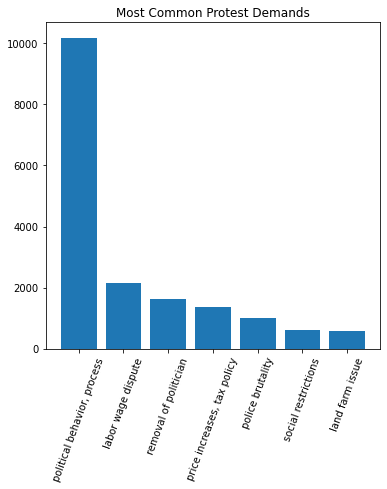

In [185]:
plt.figure(figsize = (6,6))
demands_fig = df[demands_list].sum().sort_values(ascending=False)
plt.title('Most Common Protest Demands')
plt.bar(demands_fig.index, demands_fig)
plt.xticks(rotation = 70);

    


In [186]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14474 entries, 0 to 16360
Data columns (total 29 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   country                      14474 non-null  object 
 1   year                         14474 non-null  int64  
 2   region                       14474 non-null  object 
 3   protestnumber                14474 non-null  int64  
 4   startday                     14474 non-null  float64
 5   startmonth                   14474 non-null  float64
 6   startyear                    14474 non-null  float64
 7   endday                       14474 non-null  float64
 8   endmonth                     14474 non-null  float64
 9   endyear                      14474 non-null  float64
 10  protesterviolence            14474 non-null  float64
 11  participants                 14462 non-null  object 
 12  notes                        14428 non-null  object 
 13  accomodation    

# Clean Participants

In [187]:
df['participants'].isnull().sum()

12

In [188]:
df.fillna(50, inplace=True)

In [189]:
#10s
df['participants'] = df['participants'].replace(['50+', '>50', '.', 'dozens', '> 50', '10s', '51+', 
                                                '57 former estate workers', 'scores (>50)', 'About 50 activists', 
                                                '50_', '50s', 'dozens arrested', 'About 50 protesters', 
                                                'Some 50 members', 'around 50', '<50', 'more than a dozen schools', 
                                                '> 50', 'teachers and pupils', 'Demonstrators', 'Civilians; a crowd', 
                                                'About 50', 'Volunteers and a line formed of people participating to cook beef and share it with strangers in the streets', 
                                                '50 people', 'several dozen', 'several dozens', 'Crowds', 'a group', 
                                                'a few dozen', 'few dozen', 'Dozens', 'scores', 'dozens arrested ',
                                                 '> 50 '], 50)

df['participants'] = df['participants'].replace(['>55'], 55)

df['participants'] = df['participants'].replace(['>56'], 56)

df['participants'] = df['participants'].replace(['50-60', '>60', '60+'], 60)

df['participants'] = df['participants'].replace(['64+'], 64)

df['participants'] = df['participants'].replace(['Nearly 70 parents', '> 70', '>70', '70+', '60-70'], 70)

df['participants'] = df['participants'].replace(['About 80', '80+', '>80'], 80)

In [190]:
#100s
df['participants'] = df['participants'].replace(['>100', '100+', 'About 100', 'more than 100', 'About 100 villagers', 
                                                '80-100', 'At least 100', 'About 100 activists, including 39 suspects who were summoned, and 66 more suspects who would be summoned to face charges later', 
                                                'about 100', 'Over 100', '50-100', '> 50 < 100', '50-99', 'Some 100 residents', 
                                                '90+', 'About 100 taxis', '97 public organisations', 'More than 100 people', 
                                                'About 100 people', '<100', '> 100', 'About a hundred protesters',
                                                 '> 50 < 100 ', 'Some 100 demonstrators'], 100)

df['participants'] = df['participants'].replace(['>115'], 115)

df['participants'] = df['participants'].replace(['About 120'], 120)

df['participants'] = df['participants'].replace(['130+', 'ABOUT 130 members', '>130'], 130)

df['participants'] = df['participants'].replace(['132+'], 132)

df['participants'] = df['participants'].replace(['140+'], 140)

df['participants'] = df['participants'].replace(['about 150', 'About 150 protesters', '150+', '>150'], 150)

df['participants'] = df['participants'].replace(['>170'], 170)

df['participants'] = df['participants'].replace(['200+', '>200', 'More than 200 campaigners', '150-200', 'Almost 200', 
                                                'Around 200 protesters', 'Over 200 local protesters', 'About 200 people', 
                                                '<200', 'About 200', 'more than 200', '> 200'], 200)

df['participants'] = df['participants'].replace(['>213'], 213)

df['participants'] = df['participants'].replace(['>222'], 222)

df['participants'] = df['participants'].replace(['>224'], 224)

df['participants'] = df['participants'].replace(['250+', 'Some 250 residents', '>250'], 250)

df['participants'] = df['participants'].replace(['>280'], 280)

df['participants'] = df['participants'].replace(['100s', '>50-100s', 'hundreds', 'Hundreds', 
                                                 'several hundred', 'Hundreds of student protesters', 
                                                 '>300', '>250-300', '> 300', 'a few hundred', 'busloads', 
                                                 '28 LGBT groups', '150-300', '<300', 'Several hundred demonstrators', 
                                                 'A few hundred people', 'About 300 people', 'Hundreds of residents',
                                                 '300s', 'Protesters on whom the government security forces used water cannons, rubber bullets and batons', 
                                                 'Up to 300 people', '12 arrested', 'Hundreds of Venezuelans', 
                                                 'More than 300 people', 'A general strike that paralysed Venezuela', 
                                                 'Hundreds of college students', 'Hundreds of youths', 
                                                 'Several hundred', 'increasingly large gatherings', 
                                                 'Around 300 local people', 'Hundreds of villagers', 
                                                 'about 300', '250-300', 'About 300', 'About 300 protesters', 
                                                 'Hundreds of workers', '100S', '100s+', 'hundreds', 'Hundreds of people',
                                                 'hundreds', 'A few hundred', 'several hundreds', '200-300',
                                                 '300+', 'hundreds ', 'hundreds  '], 300)

df['participants'] = df['participants'].replace(['>340'], 340)

df['participants'] = df['participants'].replace(['350+', '300-350', '>350'], 350)

df['participants'] = df['participants'].replace(['>370'], 370)

df['participants'] = df['participants'].replace(['300-400', 'About 400', '200-400', '350-400',
                                                 '> 400', '>400', '400+'], 400)

df['participants'] = df['participants'].replace(['>440', '> 450'], 450)

df['participants'] = df['participants'].replace(['500+', '20 arrested', '<500', '230 families', 'more than 500',
                                                 'at least 500', 'Nearly 500 supporters', '500+', 'About 500 people',
                                                 'Nearly 500', 'Some 500 people', 'About 500 demonstrators',
                                                 '>459', '260-500', '100s-500', '500 people', '300-500', 
                                                 '400-500', 'About 500', '> 500', '>500', '500+ '], 500)

df['participants'] = df['participants'].replace(['520+'], 520)

df['participants'] = df['participants'].replace(['567+'], 567)

df['participants'] = df['participants'].replace(['In northern Chiang Mai province, 200 kamnans and village heads; in Phetchaburi, about 400 kamnans and village heads',
                                                 '500-600', '400-600+', 'several dozen arrests', '>600', '600+',
                                                 'dozens arrested'], 600)

df['participants'] = df['participants'].replace(['25 protesters injured'], 625)

df['participants'] = df['participants'].replace(['500-700', '> 700', '600-700', '>700', '700+'], 700)

df['participants'] = df['participants'].replace(['30 arrested'], 750)

df['participants'] = df['participants'].replace(['>800', '> 800', '800+'], 800)

df['participants'] = df['participants'].replace(['800-900', '<900'], 900)

#https://datatofish.com/replace-values-pandas-dataframe/

In [191]:
#1,000s

df['participants'] = df['participants'].replace(['>1000', '1000+', 'More than 1,000', '>50-1000',
                                                 '100 wounded', '700 - >1000', '300-1000s',
                                                 'several 1000s', 'More than 1,000 teachers',
                                                 '500-1000', 'more than 1000', '100s-1000', 'About 1000',
                                                 '>1,000', '<1000', '> 1000', '100s-1000s'], 1000)

df['participants'] = df['participants'].replace(['>1100'], 1100)

df['participants'] = df['participants'].replace(['>1200', '500-1200'], 1200)

df['participants'] = df['participants'].replace(['50 arrested'], 1250)

df['participants'] = df['participants'].replace(['1300+', '> 1300'], 1300)

df['participants'] = df['participants'].replace(['1365+'], 1365)

df['participants'] = df['participants'].replace(['> 1500', '100-1500+', '< 1500', '>1500',
                                                 '1500+'], 1500)

df['participants'] = df['participants'].replace(['>1600', '1600+', '16 killed'], 1600)

df['participants'] = df['participants'].replace(['1,800 participants', '1800+'], 1800)

df['participants'] = df['participants'].replace(['Over 2,000 construction workers', 'more than 2000',
                                                 'about 2000', '1300-2000', 'About 2,000', '500-2000',
                                                 'March organiser and legal-sector lawmaker Dennis Kwok, said more than 2,000 people joined the protest. Police put the turnout at 1,700.',
                                                 'About 2,000 people', '<2000', '1500-2000',
                                                 'About 2,000 ', '>2000', '2000+', '> 2000',
                                                 '200-2000+'], 2000)

df['participants'] = df['participants'].replace(['2200+'], 2200)

df['participants'] = df['participants'].replace(['2400+'], 2400)

df['participants'] = df['participants'].replace(['over 100 arrested', '2500+', '>2500'], 2500)

df['participants'] = df['participants'].replace(['>2600'], 2600)

df['participants'] = df['participants'].replace(['>2900'], 2900)

df['participants'] = df['participants'].replace(['1000s', 'thousands', 'Thousands', 
                                                'Thousands of Indians, including Bollywood actors', 
                                                'Thousands ', 'several thousand', '>3000', '200-3000',
                                                 'a few thousand', '2000-3000', 'about 3000', '600-3000',
                                                 'Large demonstrations', 'SOME 3,000 people', '2000 to 3000',
                                                'couple thousands', 'Over 3,000', 'very low thousands',
                                                 '>3,000', '2,000 to 3,000', 'several thousand', '>3,000',
                                                 'Thousands of miners', 'Several thousand protesters',
                                                 'The organisers said more than 3,000 people; police said the turnout was 830 at its peak',
                                                 'few thousand', 'Thousands of people', '1000S', 'About 3,000',
                                                 'a few thousand', 'Several thousand', '> 3000', '3000+',
                                                 'a few thousand ', '>3,000 ', 'several thousand '], 3000)

df['participants'] = df['participants'].replace(['>3100'], 3100)

df['participants'] = df['participants'].replace(['3200+'], 3200)

df['participants'] = df['participants'].replace(['> 3500', '3500+'], 3500)

df['participants'] = df['participants'].replace(['About 4,000 people', 'About 4000', '3000-4000',
                                                 '2,000 to 4,000 people', 'More than 4,000 people', '4000+',
                                                 '>4000'], 4000)

df['participants'] = df['participants'].replace(['164 arrested'], 4100)

df['participants'] = df['participants'].replace(['3000-4500'], 4500)

df['participants'] = df['participants'].replace(['4700+'], 4700)

df['participants'] = df['participants'].replace(['5000+', '>5000', '200 arrested', 'Around 5,000',
                                                 '3000-5000', 'About 5,000 people', '3000 to 5000',
                                                 'Some 5,000 members', '>5,000', '3500-5000', '<5000',
                                                 '> 5000'], 5000)

df['participants'] = df['participants'].replace(['>5100'], 5100)

df['participants'] = df['participants'].replace(['5600+'], 5600)

df['participants'] = df['participants'].replace(['About 6,000 people', '3000-6000', 'Estimated 6,000 drivers',
                                                 '>6000', '6000+'], 6000)

df['participants'] = df['participants'].replace(['<6700'], 6700)

df['participants'] = df['participants'].replace(['6000-7000', 'About 7,000', '7000+', '>7000'], 7000)

df['participants'] = df['participants'].replace(['300 arrested'], 7500)

df['participants'] = df['participants'].replace(['6000 to 8000', '6000-8000', 'about 8000', '>8000'], 8000)

df['participants'] = df['participants'].replace(['8000-9000', '>9000', '> 9000', '7000-9000', '9000+'], 9000)



In [192]:
#10,000s

df['participants'] = df['participants'].replace(['>10000', '10000+', '1500-10000', '100s-10000',
                                                 'Estimated number of protesters at 10,000',
                                                 'About 10000', 'More than 10,000 protesters',
                                                 'More than 10,000 citizens', '1000-10000',
                                                 'nearly 10000', '3000-10000', 'At least 10,000 people',
                                                 '1100-10000s', '5000-10000', 'At least 10,000',
                                                 '1000s-10000', '1000s-10000s', '10,000', '<10000',
                                                 '100s-10000s', '> 10000', 'more than 400 arrested'], 10000)

df['participants'] = df['participants'].replace(['About 12,000 protesters', '4000-12000', '12000+'], 12000)

df['participants'] = df['participants'].replace(['13,000 people', '13000+'], 13000)

df['participants'] = df['participants'].replace(['7000-15000', '<15000', '>15,000', '15,000', '> 15000',
                                                 '15000+', '>15000'], 15000)

df['participants'] = df['participants'].replace(['Estimated to be 15,500'], 15500)

df['participants'] = df['participants'].replace(['>16000'], 16000)

df['participants'] = df['participants'].replace(['17000+'], 17000)

df['participants'] = df['participants'].replace(['>18000'], 18000)

df['participants'] = df['participants'].replace(['<20000', '20000s', '> 20000', '>20000', '20000+'], 20000)

df['participants'] = df['participants'].replace(['20700+'], 20700)

df['participants'] = df['participants'].replace(['> 23000', '23000+', '1000s-23000'], 23000)

df['participants'] = df['participants'].replace(['24000+'], 24000)

df['participants'] = df['participants'].replace(['As many as 25,000 protesters', 'between 7500-25000', 'more than 25000',
                                                 '> 25000', '25000+'], 25000)

df['participants'] = df['participants'].replace(['25100+'], 25100)

df['participants'] = df['participants'].replace(['10000s', 'Tens of thousands', 'tens of thousands', 
                                                'Mass demonstrations', 'Widespread protests throughout the valley',
                                                 'About 30,000', 'widespread', '10000s', '"Rocked by protests"', 
                                                 'btw. 20000 & 30000', 'More than 30,000', '20000-30000',
                                                 'Tens of thousands of people', '> 30000', '30000+', '>30000',
                                                 '10000s '], 30000)

df['participants'] = df['participants'].replace(['>32200'], 32200)

df['participants'] = df['participants'].replace(['> 35000', '>35000'], 35000)

df['participants'] = df['participants'].replace(['>37000'], 37000)

df['participants'] = df['participants'].replace(['more than 1500 detained'], 37500)

df['participants'] = df['participants'].replace(['30000-40000', '1000s-40000', '> 40000', '20000-40000', '>40000'], 40000)

df['participants'] = df['participants'].replace(['> 42000'], 42000)

df['participants'] = df['participants'].replace(['Between 11000 and 45000'], 45000)

df['participants'] = df['participants'].replace(['between 35,000 and 50,000', '> 50000', '5000-50000', '50000+',
                                                 'more than 50000', '>50000'], 50000)

df['participants'] = df['participants'].replace(['51000+'], 51000)

df['participants'] = df['participants'].replace(['56000+'], 56000)

df['participants'] = df['participants'].replace(['58000+'], 58000)

df['participants'] = df['participants'].replace(['20000-60000', '> 60000'], 60000)

df['participants'] = df['participants'].replace(['>60900'], 60900)

df['participants'] = df['participants'].replace(['65,000 people'], 65000)

df['participants'] = df['participants'].replace(['>70000', '35000 - 70000', '70000+', '> 70000', '<70000',
                                                 '50000-70000'], 70000)

df['participants'] = df['participants'].replace(['> 80000', '40000-80000', '50000-80000', '>80000'], 80000)

df['participants'] = df['participants'].replace(['90000+'], 90000)


In [193]:
#100,000

df['participants'] = df['participants'].replace(['100000+', 'Protests across India', '> 100000', '>100000',  
                                                '50000-100000', 'Up to 100,000', '< 100000', '100,000',
                                                 '< 100000 '], 100000)

df['participants'] = df['participants'].replace(['The Civil Human Rights Front said 110,000 people; The Hong Kong police said about 20,000'], 110000)

df['participants'] = df['participants'].replace(['50000-120000'], 120000)

df['participants'] = df['participants'].replace(['> 150000', '>150000'], 150000)

df['participants'] = df['participants'].replace(['at least 160000'], 160000)

df['participants'] = df['participants'].replace(['75000-170000'], 170000)

df['participants'] = df['participants'].replace(['> 200000', '2000-200000', '100000-200000', '>200000', '25000-200000',
                                                 '<200000', '200,000', '200000+'], 200000)

df['participants'] = df['participants'].replace(['100000s', 'hundreds of thousands', '100,000s', 
                                                'between 100000 & 300000', 'Mass protests',
                                                 'HUNDREDS OF thousands of Venezuelans', 'Huge protests',
                                                 '300000+', 'several hundred thousands', 'Hundreds of thousands',
                                                 '> 300000', '>300000', 'hundreds of thousands',
                                                 'hundreds of thousands '], 300000)

df['participants'] = df['participants'].replace(['Almost 350,000', '250000-350000'], 350000)

df['participants'] = df['participants'].replace(['<375000'], 375000)

df['participants'] = df['participants'].replace(['<400000', '200000-400000', '> 400000', '>400000'], 400000)

df['participants'] = df['participants'].replace(['430000+'], 430000)

df['participants'] = df['participants'].replace(['More than 500,000 people', '> 500000', '500,000', '500000+',
                                                 '>500000'], 500000)

df['participants'] = df['participants'].replace(['500000-700000', 'Nearly 700,000'], 700000)


In [194]:
#1,000,000

df['participants'] = df['participants'].replace(['over a million', '<1000000', '1 million', '> 1000000',
                                                 '1,000,000', '>1000000'], 1000000)
df['participants'] = df['participants'].replace(['hundreds of thousands to 1.4 million'], 1400000)
df['participants'] = df['participants'].replace(['up to two million', '>2000000'], 2000000)
df['participants'] = df['participants'].replace(['100000s-3000000', '1,000,000s', 'Millions', 'millions',
                                                 '1000000s'], 3000000)
df['participants'] = df['participants'].replace(['5,000,000'], 5000000)
df['participants'] = df['participants'].replace(['More than seven million people'], 7000000)

In [195]:
df.participants.value_counts().head(50)

50         2213
300        1582
3000       1556
50          983
1000        965
100         821
100         404
10000       400
200         388
30000       386
2000        340
300         278
500         270
5000        247
3000        228
20000       171
1000        160
150         130
4000        127
400         120
100000      113
10000       100
15000        96
30000        95
50000        86
1500         83
6000         77
300000       72
7000         65
8000         61
60           59
700          57
2000         56
200          56
5000         56
500          55
250          53
600          50
40000        47
25000        46
800          45
200000       39
70           38
100000       38
2500         37
60000        27
80           25
1000000      25
12000        24
80000        24
Name: participants, dtype: int64

In [196]:
df['participants'] = pd.to_numeric(df['participants'])

In [197]:
df.dtypes

country                         object
year                             int64
region                          object
protestnumber                    int64
startday                       float64
startmonth                     float64
startyear                      float64
endday                         float64
endmonth                       float64
endyear                        float64
protesterviolence              float64
participants                     int64
notes                           object
accomodation                     uint8
arrests                          uint8
beatings                         uint8
crowd dispersal                  uint8
ignore                           uint8
killings                         uint8
shootings                        uint8
stateresponse                   object
stateresponse_violence           int64
labor wage dispute               uint8
land farm issue                  uint8
police brutality                 uint8
political behavior, proce

# Clean Dates

In [198]:
cols = ['startmonth', 'startday', 'startyear']
df['startdate'] = df[cols].apply(lambda row: '-'.join(row.values.astype(str)), axis=1)

In [199]:
df.head()

,country,year,region,protestnumber,startday,startmonth,startyear,endday,endmonth,endyear,...,stateresponse,stateresponse_violence,labor wage dispute,land farm issue,police brutality,"political behavior, process","price increases, tax policy",removal of politician,social restrictions,startdate
0,Canada,1990,North America,1,15.0,1.0,1990.0,15.0,1.0,1990.0,...,ignore,0,1,0,0,1,0,0,0,1.0-15.0-1990.0
1,Canada,1990,North America,2,25.0,6.0,1990.0,25.0,6.0,1990.0,...,ignore,0,0,0,0,1,0,0,0,6.0-25.0-1990.0
2,Canada,1990,North America,3,1.0,7.0,1990.0,1.0,7.0,1990.0,...,ignore,0,0,0,0,1,0,0,0,7.0-1.0-1990.0
3,Canada,1990,North America,4,12.0,7.0,1990.0,6.0,9.0,1990.0,...,accomodation,0,0,1,0,0,0,0,0,7.0-12.0-1990.0
4,Canada,1990,North America,5,14.0,8.0,1990.0,15.0,8.0,1990.0,...,arrests,1,0,0,0,1,0,0,0,8.0-14.0-1990.0


In [200]:
df['startdate']=df['startdate'].str.replace('\.0','')

In [201]:
df['startdate']

0         1-15-1990
1         6-25-1990
2          7-1-1990
3         7-12-1990
4         8-14-1990
            ...    
16355     2-16-2014
16357     5-15-2016
16358     6-15-2017
16359     7-15-2017
16360    10-31-2017
Name: startdate, Length: 14474, dtype: object

In [202]:
df.tail(5)

,country,year,region,protestnumber,startday,startmonth,startyear,endday,endmonth,endyear,...,stateresponse,stateresponse_violence,labor wage dispute,land farm issue,police brutality,"political behavior, process","price increases, tax policy",removal of politician,social restrictions,startdate
16355,Papua New Guinea,2014,Oceania,1,16.0,2.0,2014.0,18.0,2.0,2014.0,...,shootings,1,0,0,0,1,0,0,0,2-16-2014
16357,Papua New Guinea,2016,Oceania,1,15.0,5.0,2016.0,9.0,6.0,2016.0,...,killings,1,0,0,0,0,0,1,0,5-15-2016
16358,Papua New Guinea,2017,Oceania,1,15.0,6.0,2017.0,15.0,6.0,2017.0,...,accomodation,0,0,1,0,1,0,0,0,6-15-2017
16359,Papua New Guinea,2017,Oceania,2,15.0,7.0,2017.0,15.0,7.0,2017.0,...,crowd dispersal,0,0,0,0,1,0,0,0,7-15-2017
16360,Papua New Guinea,2017,Oceania,3,31.0,10.0,2017.0,31.0,10.0,2017.0,...,ignore,0,0,0,0,1,0,0,0,10-31-2017


In [203]:
#df=df[df['startdate']!='nan-nan-nan']

In [204]:
df['startdate']

0         1-15-1990
1         6-25-1990
2          7-1-1990
3         7-12-1990
4         8-14-1990
            ...    
16355     2-16-2014
16357     5-15-2016
16358     6-15-2017
16359     7-15-2017
16360    10-31-2017
Name: startdate, Length: 14474, dtype: object

In [205]:
df['startdate']=pd.to_datetime(df['startdate'])

In [206]:
df['startdate']

0       1990-01-15
1       1990-06-25
2       1990-07-01
3       1990-07-12
4       1990-08-14
           ...    
16355   2014-02-16
16357   2016-05-15
16358   2017-06-15
16359   2017-07-15
16360   2017-10-31
Name: startdate, Length: 14474, dtype: datetime64[ns]

In [207]:
cols=['endmonth','endday','endyear']
df['enddate'] = df[cols].apply(lambda row: '-'.join(row.values.astype(str)), axis=1)

In [208]:
df['enddate']

0         1.0-15.0-1990.0
1         6.0-25.0-1990.0
2          7.0-1.0-1990.0
3          9.0-6.0-1990.0
4         8.0-15.0-1990.0
               ...       
16355     2.0-18.0-2014.0
16357      6.0-9.0-2016.0
16358     6.0-15.0-2017.0
16359     7.0-15.0-2017.0
16360    10.0-31.0-2017.0
Name: enddate, Length: 14474, dtype: object

In [209]:
df['enddate']=df['enddate'].str.replace('\.0','')

In [210]:
df['enddate']

0         1-15-1990
1         6-25-1990
2          7-1-1990
3          9-6-1990
4         8-15-1990
            ...    
16355     2-18-2014
16357      6-9-2016
16358     6-15-2017
16359     7-15-2017
16360    10-31-2017
Name: enddate, Length: 14474, dtype: object

In [211]:
df['enddate']=pd.to_datetime(df['enddate'])

In [212]:
df['enddate']

0       1990-01-15
1       1990-06-25
2       1990-07-01
3       1990-09-06
4       1990-08-15
           ...    
16355   2014-02-18
16357   2016-06-09
16358   2017-06-15
16359   2017-07-15
16360   2017-10-31
Name: enddate, Length: 14474, dtype: datetime64[ns]

In [213]:
df['duration']=df['enddate']-df['startdate']

In [214]:
df['duration'].sort_values(ascending=False)

11631   938 days
14531   731 days
6150    658 days
12431   626 days
2488    367 days
          ...   
10122     0 days
10121     0 days
10120     0 days
10119     0 days
0         0 days
Name: duration, Length: 14474, dtype: timedelta64[ns]

In [215]:
df.columns

Index(['country', 'year', 'region', 'protestnumber', 'startday', 'startmonth',
       'startyear', 'endday', 'endmonth', 'endyear', 'protesterviolence',
       'participants', 'notes', 'accomodation', 'arrests', 'beatings',
       'crowd dispersal', 'ignore', 'killings', 'shootings', 'stateresponse',
       'stateresponse_violence', 'labor wage dispute', 'land farm issue',
       'police brutality', 'political behavior, process',
       'price increases, tax policy', 'removal of politician',
       'social restrictions', 'startdate', 'enddate', 'duration'],
      dtype='object')

# Datetime Modifications

In [216]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14474 entries, 0 to 16360
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype          
---  ------                       --------------  -----          
 0   country                      14474 non-null  object         
 1   year                         14474 non-null  int64          
 2   region                       14474 non-null  object         
 3   protestnumber                14474 non-null  int64          
 4   startday                     14474 non-null  float64        
 5   startmonth                   14474 non-null  float64        
 6   startyear                    14474 non-null  float64        
 7   endday                       14474 non-null  float64        
 8   endmonth                     14474 non-null  float64        
 9   endyear                      14474 non-null  float64        
 10  protesterviolence            14474 non-null  float64        
 11  participants                

In [217]:
import time
import datetime
def datetime_to_int(dt):
    return int(dt.strftime("%Y%m%d%H%M%S"))

In [218]:
df['duration']=df['duration'].astype('timedelta64[D]').astype(int)

In [219]:
df['startdate']=df['startdate'].map(datetime_to_int)

In [220]:
df['enddate']=df['enddate'].map(datetime_to_int)

In [221]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14474 entries, 0 to 16360
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   country                      14474 non-null  object 
 1   year                         14474 non-null  int64  
 2   region                       14474 non-null  object 
 3   protestnumber                14474 non-null  int64  
 4   startday                     14474 non-null  float64
 5   startmonth                   14474 non-null  float64
 6   startyear                    14474 non-null  float64
 7   endday                       14474 non-null  float64
 8   endmonth                     14474 non-null  float64
 9   endyear                      14474 non-null  float64
 10  protesterviolence            14474 non-null  float64
 11  participants                 14474 non-null  int64  
 12  notes                        14474 non-null  object 
 13  accomodation    

# Drop Columns and add Dummies

In [222]:
df.drop(columns=['startday', 'startmonth', 'startyear', 'endday', 'endmonth', 'endyear', 'startdate', 'enddate'], inplace=True)

In [226]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14474 entries, 0 to 16360
Columns: 222 entries, protestnumber to region_South America
dtypes: float64(1), int64(4), object(2), uint8(215)
memory usage: 4.5+ MB


In [227]:
df = pd.get_dummies(df, columns=['country', 'year', 'region'], drop_first=True)

KeyError: "None of [Index(['country', 'year', 'region'], dtype='object')] are in the [columns]"

In [228]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14474 entries, 0 to 16360
Columns: 222 entries, protestnumber to region_South America
dtypes: float64(1), int64(4), object(2), uint8(215)
memory usage: 4.5+ MB


# Write clean data to CSV

In [229]:
df.to_csv('../data/clean_data_state_response.csv', index=False)